In [1]:
import mesa_reader as mr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pc
%matplotlib inline

In [2]:
# Load history files

h1p5 = mr.MesaData('../../../Internship/Ultra-stripped-SNe/Tests/test_Savvas_models/single_He_stars_evolution/LOGS_1p5/history_1p5.data')
h3p5 = mr.MesaData('../../../Internship/Ultra-stripped-SNe/Tests/test_Savvas_models/single_He_stars_evolution/No_rotation_models/3p5_fecc/3p5_kipp/LOGS/history.data')
h2p5_first = mr.MesaData('../2p5M/LOGS/history.data')
h2p5_second = mr.MesaData('../2p5M/LOGS_cont/history_cont.data')
h2p1 = mr.MesaData('../2p1M/LOGS/history.data')
h8p0 = mr.MesaData('../8p0M/LOGS/history.data')

#--------------------------------------------------------------------------------------
h1p5.remove_backups(dbg=True)
h3p5.remove_backups(dbg=True)
h2p5_first.remove_backups(dbg=True)
h2p5_second.remove_backups(dbg=True)
h2p1.remove_backups(dbg=True)
h8p0.remove_backups(dbg=True)

Scrubbing history...
Already clean!
Scrubbing history...
Already clean!
Scrubbing history...
Already clean!
Scrubbing history...
Already clean!
Scrubbing history...
Already clean!
Scrubbing history...
Already clean!


In [3]:
# Define variables

# Central densities

rho_c_1p5 = h1p5.data('log_cntr_Rho')
rho_c_3p5 = h3p5.data('log_cntr_Rho')
rho_c_2p5_f = h2p5_first.data('log_cntr_Rho')
rho_c_2p5_s = h2p5_second.data('log_cntr_Rho')
rho_c_2p1 = h2p1.data('log_cntr_Rho')
rho_c_8p0 = h8p0.data('log_cntr_Rho')

# Central temperatures

T_c_1p5 = h1p5.data('log_cntr_T')
T_c_3p5 = h3p5.data('log_cntr_T')
T_c_2p5_f = h2p5_first.data('log_cntr_T')
T_c_2p5_s = h2p5_second.data('log_cntr_T')
T_c_2p1 = h2p1.data('log_cntr_T')
T_c_8p0 = h8p0.data('log_cntr_T')

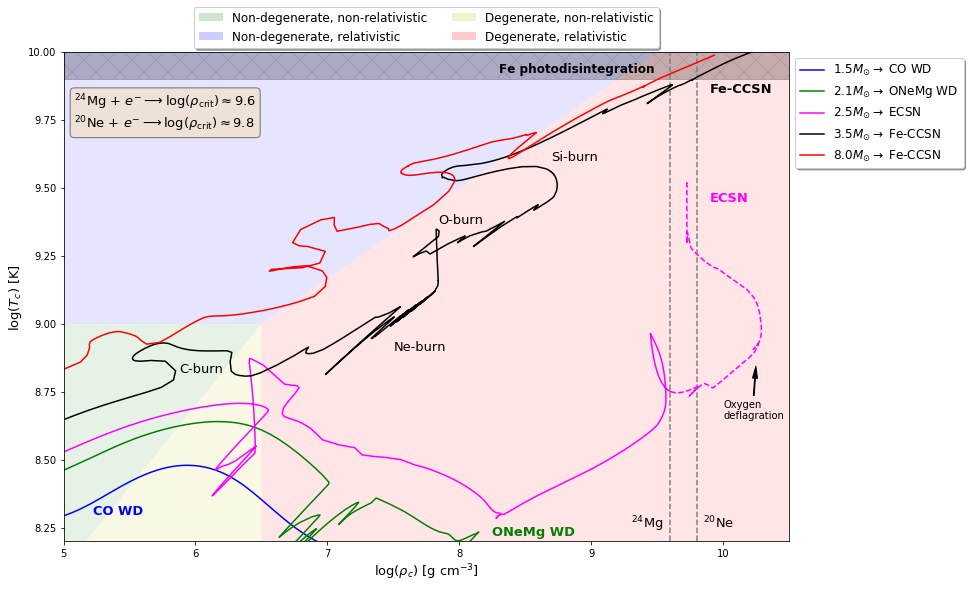

In [41]:
plt.figure(figsize = (13,9))

plt.xlabel(r'$\log(\rho_c)$ [g cm$^{-3}$]', fontsize = 13)
plt.ylabel(r'$\log(T_c)$ [K]', fontsize = 13)

# Limits for electron capture
#--------------------------------------------------------------------
#EC_Mg = np.linspace(9.6,9.6)
#EC_Ne = np.linspace(9.8,9.8)
#y = np.linspace(7.7, 9.9)
#y2 = np.linspace(7.7, 9.9)

# -------------------------------------------------------------------
plt.xlim([5, 10.5])
plt.ylim([8.2, 10])

# Plot electron captures threshold

plt.axvline(x = 9.6, color = 'grey', linestyle = '--')
plt.axvline(x = 9.8, color = 'grey', linestyle = '--')


# Basic plot

plt.plot(rho_c_1p5, T_c_1p5, c = 'blue', label = r"$1.5M_{\odot} \rightarrow$ CO WD")
plt.plot(rho_c_2p1, T_c_2p1, c = 'green', label = r"$2.1M_{\odot} \rightarrow$ ONeMg WD")
plt.plot(rho_c_2p5_f, T_c_2p5_f, c = 'magenta', label = r'$2.5M_{\odot} \rightarrow$ ECSN')
plt.plot(rho_c_2p5_s, T_c_2p5_s, '--', c = 'magenta')
plt.plot(rho_c_3p5, T_c_3p5, c = 'k', label = r"$3.5M_{\odot} \rightarrow$ Fe-CCSN")
plt.plot(rho_c_8p0, T_c_8p0, c = 'red', label = r"$8.0M_{\odot} \rightarrow$ Fe-CCSN")

legend = plt.legend(loc = 'upper left', prop = {'size':12},
          bbox_to_anchor=(1, 1), shadow = True)

# Photodisintegration of iron into He, protons and neutrons
plt.axhspan(9.9, 10.1, color='grey', alpha=0.5)
plt.fill_between([5, 11], 9.9, 10, facecolor="none", hatch = "X", linewidth = 0.0, edgecolor = "grey", alpha = 0.3)
plt.text(8.3, 9.925, "Fe photodisintegration", fontsize = 12, fontweight='bold')

# Electron capture criteria (box)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join((
    r"$^{24}$Mg $+ \ e^{-} \longrightarrow \log(\rho_{\mathrm{crit}}) \approx 9.6$",
    r"$^{20}$Ne $+ \ e^{-} \longrightarrow \log(\rho_{\mathrm{crit}}) \approx 9.8$"))
plt.text(5.08, 9.72, textstr, fontsize = 13, bbox=props)

# Write text
plt.text(9.3, 8.25, r'$^{24}$Mg', fontsize = 13)
plt.text(9.85, 8.25, r'$^{20}$Ne', fontsize = 13)

plt.text(5.22, 8.3, 'CO WD', color = 'blue', fontsize = 13, fontweight='bold')
plt.text(8.25, 8.22, 'ONeMg WD', color = 'green', fontsize = 13, fontweight='bold')
plt.text(9.9, 9.45, 'ECSN', color = 'magenta', fontsize = 13, fontweight='bold')
plt.text(9.9, 9.85, "Fe-CCSN", fontsize = 13, fontweight='bold')

#------------------------------------------------------
plt.text(5.88, 8.82, 'C-burn', fontsize = 13)
plt.text(7.5, 8.9, 'Ne-burn', fontsize = 13)
plt.text(7.84, 9.37, 'O-burn', fontsize = 13)
plt.text(8.7, 9.6, 'Si-burn', fontsize = 13)
#------------------------------------------------------
textstr2 = '\n'.join((
    'Oxygen',
    'deflagration'))
plt.annotate(textstr2, xy=(10.25, 8.85), xytext=(10.0, 8.65), 
            arrowprops=dict(facecolor='black', width = 0.8, headwidth = 5 ,shrink=0.05),
            )


# Regimes of pressure
# -----------------------------------------------------
x_fill_deg = [0, 6.5, 6.5, 0]
y_fill_deg = [0, 0, 9.0, 5.1]
plt.fill(x_fill_deg, y_fill_deg, 'y', alpha = 0.1)
#plt.text(5.6, 8.3, 'D, NR', fontsize = 13)

x_fill_rel = [6.5, 11, 11, 6.5]
y_fill_rel = [0, 0, 10.5, 9]
plt.fill(x_fill_rel, y_fill_rel, 'r', alpha = 0.1)
#plt.text(6.6, 8.3, "D, R", fontsize = 13)

x_fill_non_deg = [0, 6.5, 0]
y_fill_non_deg = [5.1, 9.0, 9.0]
plt.fill(x_fill_non_deg, y_fill_non_deg, 'g', alpha = 0.1)
#plt.text(4.2, 10.75, "Non-degenerate (ND), Relativistic (R)", fontsize = 13)

x_fill_non_deg_non_rel = [0, 6.5, 11, 11, 0]
y_fill_non_deg_non_rel = [9.0, 9.0, 10.5, 12, 12]
plt.fill(x_fill_non_deg_non_rel, y_fill_non_deg_non_rel, 'b', alpha = 0.1)
#plt.text(4.2, 8.9, "ND, NR", fontsize = 13)

leg_NDNR = pc.Patch(facecolor = 'g', alpha = 0.2, label = 'Non-degenerate, non-relativistic')
leg_NDR = pc.Patch(facecolor = 'b', alpha = 0.2, label = 'Non-degenerate, relativistic')
leg_DNR = pc.Patch(facecolor = 'y', alpha = 0.2, label = 'Degenerate, non-relativistic')
leg_DR = pc.Patch(facecolor = 'r', alpha = 0.2, label = 'Degenerate, relativistic')

plt.legend(handles = [leg_NDNR, leg_NDR, leg_DNR, leg_DR], loc = 'center', prop = {'size':12},
          bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow = True)

plt.gca().add_artist(legend)

#plt.savefig('T_rho_comp.png', bbox_inches='tight', dpi = 300)